<a href="https://colab.research.google.com/github/ukeshbhaal/Task-6-Guvi-5-assignments-/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
#TASK 1
df_gc = pd.DataFrame(ground_cricket_data)

regr_gc = linear_model.LinearRegression()
ground_temp = df_gc[['Ground Temperature']]
chirps_sec = df_gc['Chirps/Second']
regr_gc.fit(ground_temp, chirps_sec)

LinearRegression()

In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr_gc.coef_[0], regr_gc.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


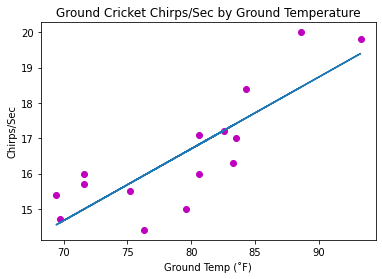

In [ ]:
#TASK2
plt.scatter(ground_temp, chirps_sec, color='m')
plt.plot(ground_temp, regr_gc.predict(ground_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()


In [ ]:
#TASK3
print('R^2 score for this equation: {:.4f}'
      .format(regr_gc.score(ground_temp, chirps_sec)))
#0.8 and greater is considered a strong correlation.
#If less than 0.8 means it is not,So 0.69 is less than 0.8

R^2 score for this equation: 0.6923


In [ ]:
#TASK4
#Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?


def temp_to_chirps(ret):
    y=regr_gc.coef_[0]*ret +regr_gc.intercept_ 
    print('At {}˚F Temp, Expected chrips is {:.4f} '.format( ret,y))
temp_to_chirps(95)

"""print('At 95˚F, our approximation of chirps/sec is: {:.4f}'
      .format(regr_gc.predict(95)[0]))"""

At 95˚F Temp, Expected chrips is 19.7443 


"print('At 95˚F, our approximation of chirps/sec is: {:.4f}'\n      .format(regr_gc.predict(95)[0]))"

In [ ]:
#TASK5
def chirps_to_temp(y):
    ret = (y - regr_gc.intercept_) / regr_gc.coef_[0]
    print('With an observation of {} chirps/sec, '
          'we expect a ground temp of {:.2f}˚F'.format(y, ret))
chirps_to_temp(18)
    

With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("/content/brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
#Task 1
df1 = pd.DataFrame(df)
"""
df_bb = pd.DataFrame(df)
regr_bb = linear_model.LinearRegression()
body = df_bb[['Body']]
brain = df_bb['Brain']
regr_bb.fit(body, brain)
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr_bb.coef_[0], regr_bb.intercept_))"""


r = linear_model.LinearRegression()
brain = df1[['Brain']]
body = df1['Body']
r.fit(brain,body)
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(r.coef_[0], r.intercept_))

Linear Regression Equation: y = 0.9665 * x + 91.0044


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Brain
Feature names seen at fit time, yet now missing:
- Ground Temperature

  warnings.warn(message, FutureWarning)


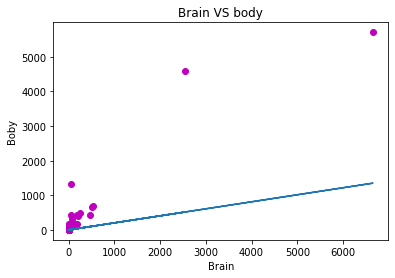

In [ ]:
#Task 2
plt.scatter(brain, body, color='m')
plt.plot(brain, regr_gc.predict(brain))
plt.title('Brain VS body')
plt.xlabel('Brain')
plt.ylabel('Boby')
plt.show()

In [ ]:
#Task 3
print('R^2 score for this equation: {:.4f}'
      .format(regr_gc.score(brain, body)))
#0.8 and greater is considered a strong correlation.


R^2 score for this equation: 0.2591


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Brain
Feature names seen at fit time, yet now missing:
- Ground Temperature

  warnings.warn(message, FutureWarning)


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
#task 1

dfs = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
print(dfs)
s = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']


    Sex  Rank  Year  Degree  YSdeg  Salary
0     0     3    25       1     35   36350
1     0     3    13       1     22   35350
2     0     3    10       1     23   28200
3     1     3     7       1     27   26775
4     0     3    19       0     30   33696
5     0     3    16       1     21   28516
6     1     3     0       0     32   24900
7     0     3    16       1     18   31909
8     0     3    13       0     30   31850
9     0     3    13       0     31   32850
10    0     3    12       1     22   27025
11    0     2    15       1     19   24750
12    0     3     9       1     17   28200
13    0     2     9       0     27   23712
14    0     3     9       1     24   25748
15    0     3     7       1     15   29342
16    0     3    13       1     20   31114
17    0     2    11       0     14   24742
18    0     2    10       0     15   22906
19    0     3     6       0     21   24450
20    0     1    16       0     23   19175
21    0     2     8       0     31   20525
22    0    

In [ ]:
df11=pd.DataFrame(dfs)
re = linear_model.LinearRegression()

def l(s,dfs):
  s1=dfs[s]
  sa=dfs['Salary']
  re.fit(s1,sa)
  print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(s, re.coef_, re.intercept_))
l(s,dfs)


"""s1=df[s]
sa=df11['Salary']
re.fit(s1,sa)
print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(s, re.coef_[0], re.intercept_))"""




The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


"s1=df[s]\nsa=df11['Salary']\nre.fit(s1,sa)\nprint('The equation for columns {} with respect to Salary:\n'\n          '{} + {}'.format(s, re.coef_[0], re.intercept_))"

In [ ]:
#task 2

def t(s, df, focus='Salary'):
    input = df[s]
    output = df[focus]
    re = linear_model.LinearRegression()
    re.fit(input, output)
    return re.score(input, output)

print('R^2 score for equation using all columns: {}'
      .format(t(s, dfs)))

R^2 score for equation using all columns: 0.8547180674410969


In [ ]:
#task -3 
num_by_sex = dfs.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


In [ ]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]
combos = get_combos(s)
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[t(list(n), df, focus)] = n
    return combo_scores
combo_scores = all_combo_scores(combos, dfs)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

 0.06389892583288004 - Sex - R square value

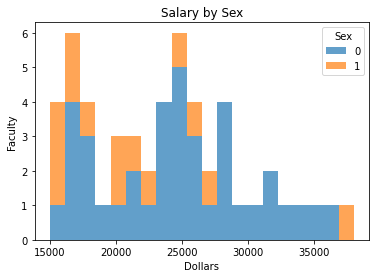

In [ ]:
dfs.pivot_table(index=dfs.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [ ]:
#The women at this university have only been at their present rank for at most 10 years; 
#let's compare with the men who have a similar number of years.

#Comparing Men and Women with Similar Number of Years
dfs10 = dfs[dfs['Year'] <= 10]
combos_10 = get_combos(s)
combo_10_scores = all_combo_scores(combos_10, dfs10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660304, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482044, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

Again, we see that Sex has no direct influence on Salary: score of 0.0068777005613497311.